In [1]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_V1.xlsx")
allocine.head()

ID                                            acteurs  \
0   121  Harrison Ford, Karen Allen, Paul Freeman, John...   
1  1317  Aymeric Cormerais, Jean-Jacques Le Vessier, Ga...   
2  2133  Tom Cruise, Kelly McGillis, Tom Skerritt, Val ...   
3  2314  Anna Ciepielewska, Aleksandra Slaska, Jan Krec...   
4  3239  Marie Ault, Arthur Chesney, Reginald Gardiner,...   

                    genre                     realisateur  \
0        Action, Aventure                Steven Spielberg   
1      Comédie dramatique                   Yvon Marciano   
2  Action, Drame, Romance                      Tony Scott   
3                   Drame  Andrzej Munk, Witold Lesiewicz   
4         Policier, Drame                Alfred Hitchcock   

                                          scenariste  duree  \
0      Philip Kaufman, Lawrence Kasdan, George Lucas  116.0   
1                                      Yvon Marciano  103.0   
2                            Jim Cash, Jack Epps Jr.  110.0   
3         Zofia Posmysz, Andrzej Munk, Zofia Posmysz   62.0   
4  Eliot Stannard, Alfred Hitchcock, Marie Belloc...   79.0   

                  date   annee           titre_original  note_presse  \
0  1981-09-16 00:00:00  1981.0  Raiders of the Lost Ark          4.6   
1  2009-10-07 00:00:00  2009.0                      NaN          1.9   
2  1986-09-17 00:00:00  1986.0                      NaN          2.8   
3  1964-10-28 00:00:00  1964.0                Pasazerka          4.6   
4  2010-11-17 00:00:00  2010.0                      NaN          5.0   

   note_spectateurs             pays         distributeur        budget  \
0               4.4           U.S.A.                  CIC  22 000 000 $   
1               2.2           France  Colifilms Diffusion           NaN   
2               3.1           U.S.A.       Splendor Films  15 000 000 $   
3               3.6          Pologne       Malavida Films           NaN   
4               4.0  Grande-Bretagne       Carlotta Films           NaN   

                                   titre  premiere_semaine_france  \
0      Les Aventuriers de l'Arche perdue                      NaN   
1                                Vivre !                   3012.0   
2                                Top Gun                      NaN   
3                           La Passagère                   1420.0   
4  The Lodger: A Story of the London Fog                    615.0   

   cumul_france  premiere_semaine_US   cumul_US    year  
0           NaN            1673731.0  1673731.0  2012.0  
1        3364.0                  NaN        NaN  2009.0  
2           NaN            1900000.0  1900000.0  2013.0  
3        2640.0                  NaN        NaN  2023.0  
4        1084.0                  NaN        NaN  2010.0

In [3]:
# Je retire les lignes qui n'ont pas de titre et pas de date
allocine = allocine.dropna(subset=['titre','date'])

In [4]:
# Convertir la colonne 'date' en format datetime
allocine['date'] = pd.to_datetime(allocine['date'], format='%Y-%m-%d', errors='coerce')

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
dtype: object

In [5]:
# Convertir la colonne 'date' en format datetime
allocine['date'] = pd.to_datetime(allocine['date'], format='%Y-%m-%d', errors='coerce')

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
dtype: object

In [6]:
# Créer les nouvelles colonnes 'realease_year', 'release_month', 'release_day'
allocine.loc[:, 'release_year'] = allocine['date'].dt.year
allocine.loc[:, 'release_month'] = allocine['date'].dt.month
allocine.loc[:, 'release_day'] = allocine['date'].dt.day

allocine.head()

ID                                            acteurs  \
0   121  Harrison Ford, Karen Allen, Paul Freeman, John...   
1  1317  Aymeric Cormerais, Jean-Jacques Le Vessier, Ga...   
2  2133  Tom Cruise, Kelly McGillis, Tom Skerritt, Val ...   
3  2314  Anna Ciepielewska, Aleksandra Slaska, Jan Krec...   
4  3239  Marie Ault, Arthur Chesney, Reginald Gardiner,...   

                    genre                     realisateur  \
0        Action, Aventure                Steven Spielberg   
1      Comédie dramatique                   Yvon Marciano   
2  Action, Drame, Romance                      Tony Scott   
3                   Drame  Andrzej Munk, Witold Lesiewicz   
4         Policier, Drame                Alfred Hitchcock   

                                          scenariste  duree       date  \
0      Philip Kaufman, Lawrence Kasdan, George Lucas  116.0 1981-09-16   
1                                      Yvon Marciano  103.0 2009-10-07   
2                            Jim Cash, Jack Epps Jr.  110.0 1986-09-17   
3         Zofia Posmysz, Andrzej Munk, Zofia Posmysz   62.0 1964-10-28   
4  Eliot Stannard, Alfred Hitchcock, Marie Belloc...   79.0 2010-11-17   

    annee           titre_original  note_presse  ...        budget  \
0  1981.0  Raiders of the Lost Ark          4.6  ...  22 000 000 $   
1  2009.0                      NaN          1.9  ...           NaN   
2  1986.0                      NaN          2.8  ...  15 000 000 $   
3  1964.0                Pasazerka          4.6  ...           NaN   
4  2010.0                      NaN          5.0  ...           NaN   

                                   titre premiere_semaine_france cumul_france  \
0      Les Aventuriers de l'Arche perdue                     NaN          NaN   
1                                Vivre !                  3012.0       3364.0   
2                                Top Gun                     NaN          NaN   
3                           La Passagère                  1420.0       2640.0   
4  The Lodger: A Story of the London Fog                   615.0       1084.0   

  premiere_semaine_US   cumul_US    year  release_year  release_month  \
0           1673731.0  1673731.0  2012.0        1981.0            9.0   
1                 NaN        NaN  2009.0        2009.0           10.0   
2           1900000.0  1900000.0  2013.0        1986.0            9.0   
3                 NaN        NaN  2023.0        1964.0           10.0   
4                 NaN        NaN  2010.0        2010.0           11.0   

   release_day  
0         16.0  
1          7.0  
2         17.0  
3         28.0  
4         17.0  

[5 rows x 23 columns]

In [7]:
# Suite à cette transformation, je retire les lignes qui ont des dates en NA
allocine = allocine.dropna(subset=['date'])

In [8]:
allocine['release_year'] = allocine['release_year'].astype(int)
allocine['release_month'] = allocine['release_month'].astype(int)
allocine['release_day'] = allocine['release_day'].astype(int)

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
release_year                        int32
release_month                       int32
release_day                         int32
dtype: object

In [9]:
allocine.shape

(11827, 23)

In [10]:
# Liste des genres
genres_list = ['Action', 'Animation', 'Aventure', 'Biopic', 'Comédie', 'Comédie dramatique', 'Comédie musicale', 'Drame', 'Epouvante-horreur', 'Famille', 'Fantastique', 'Guerre', 'Historique', 'Musical', 'Policier', 'Romance', 'Science Fiction', 'Thriller', 'Western']

# Création de colonnes pour chaque genre avec des valeurs booléennes
for genre in genres_list:
    allocine[genre] = allocine['genre'].str.contains(genre, case=False, na=False)

allocine.head()

ID                                            acteurs  \
0   121  Harrison Ford, Karen Allen, Paul Freeman, John...   
1  1317  Aymeric Cormerais, Jean-Jacques Le Vessier, Ga...   
2  2133  Tom Cruise, Kelly McGillis, Tom Skerritt, Val ...   
3  2314  Anna Ciepielewska, Aleksandra Slaska, Jan Krec...   
4  3239  Marie Ault, Arthur Chesney, Reginald Gardiner,...   

                    genre                     realisateur  \
0        Action, Aventure                Steven Spielberg   
1      Comédie dramatique                   Yvon Marciano   
2  Action, Drame, Romance                      Tony Scott   
3                   Drame  Andrzej Munk, Witold Lesiewicz   
4         Policier, Drame                Alfred Hitchcock   

                                          scenariste  duree       date  \
0      Philip Kaufman, Lawrence Kasdan, George Lucas  116.0 1981-09-16   
1                                      Yvon Marciano  103.0 2009-10-07   
2                            Jim Cash, Jack Epps Jr.  110.0 1986-09-17   
3         Zofia Posmysz, Andrzej Munk, Zofia Posmysz   62.0 1964-10-28   
4  Eliot Stannard, Alfred Hitchcock, Marie Belloc...   79.0 2010-11-17   

    annee           titre_original  note_presse  ...  Famille Fantastique  \
0  1981.0  Raiders of the Lost Ark          4.6  ...    False       False   
1  2009.0                      NaN          1.9  ...    False       False   
2  1986.0                      NaN          2.8  ...    False       False   
3  1964.0                Pasazerka          4.6  ...    False       False   
4  2010.0                      NaN          5.0  ...    False       False   

  Guerre Historique Musical  Policier  Romance  Science Fiction  Thriller  \
0  False      False   False     False    False            False     False   
1  False      False   False     False    False            False     False   
2  False      False   False     False     True            False     False   
3  False      False   False     False    False            False     False   
4  False      False   False      True    False            False     False   

   Western  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 42 columns]

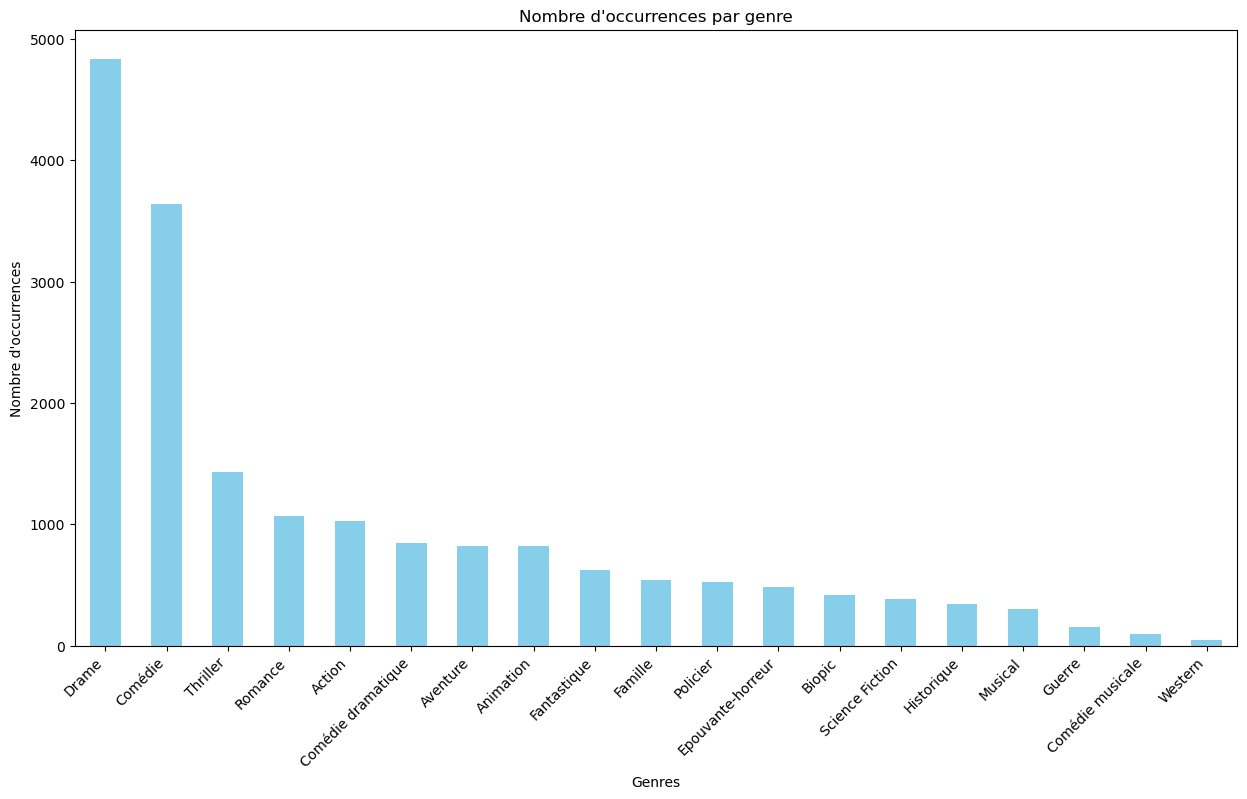

In [11]:
# Création d'un DataFrame avec le nombre d'occurrences de chaque genre
genre_counts = allocine[genres_list].sum().sort_values(ascending=False)

# Création du graphique à barres
plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'occurrences par genre')
plt.xlabel('Genres')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
allocine.isna().sum()

ID                            0
acteurs                    1766
genre                       122
realisateur                 143
scenariste                  932
duree                       158
date                          0
annee                         0
titre_original             7487
note_presse                  46
note_spectateurs           1256
pays                         10
distributeur                605
budget                     8557
titre                         0
premiere_semaine_france     818
cumul_france                820
premiere_semaine_US        8636
cumul_US                   8720
year                          0
release_year                  0
release_month                 0
release_day                   0
Action                        0
Animation                     0
Aventure                      0
Biopic                        0
Comédie                       0
Comédie dramatique            0
Comédie musicale              0
Drame                         0
Epouvant

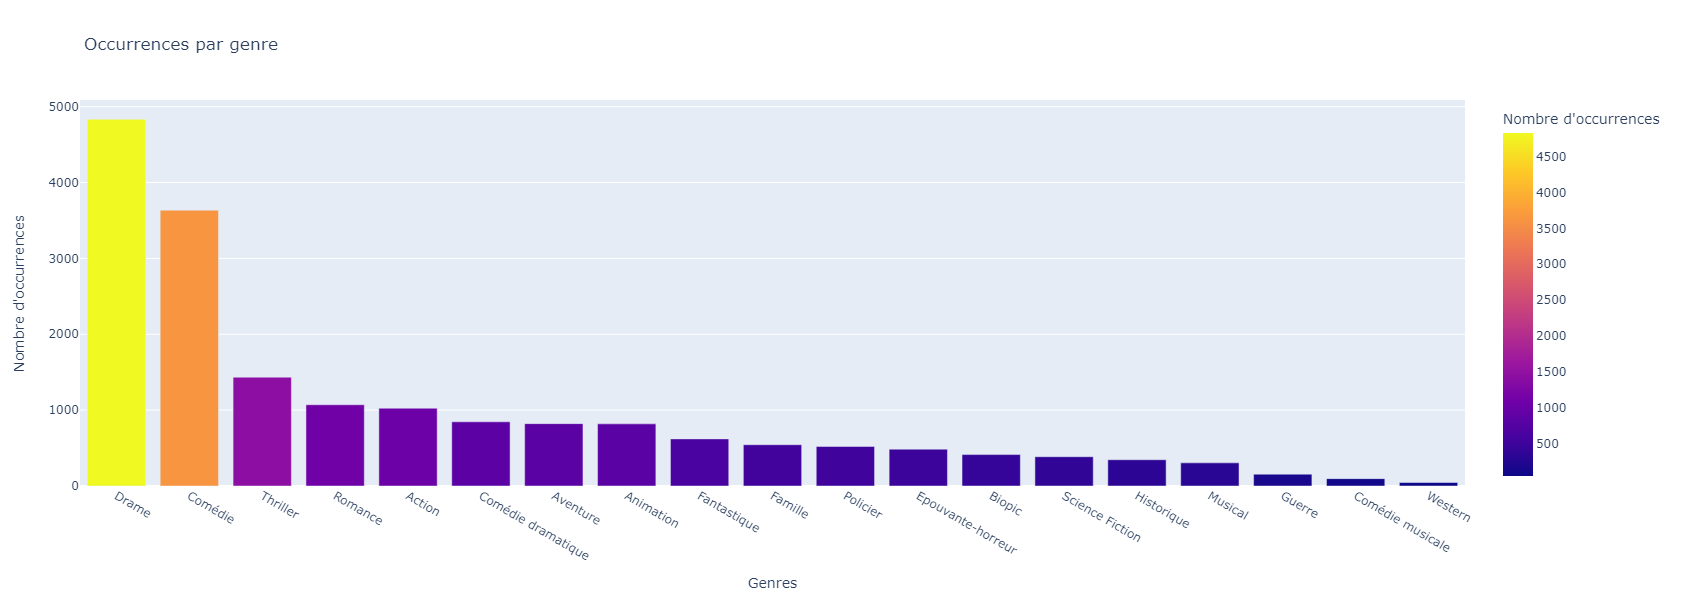

In [13]:
import plotly.express as px

# Création d'un DataFrame avec le nombre d'occurrences de chaque genre
genre_counts = allocine[genres_list].sum().sort_values(ascending=False).reset_index()
genre_counts.columns = ['Genre', 'Occurrences']

# Création du graphique interactif avec Plotly
fig = px.bar(genre_counts, x='Genre', y='Occurrences', color='Occurrences',
             labels={'Occurrences': 'Nombre d\'occurrences', 'Genre': 'Genres'},
             title='Occurrences par genre')

# Ajuster la hauteur du graphique
fig.update_layout(height=600)

fig.show()

In [14]:
# Ce sont les drames qui sont les plus représentés dans le jeu de données, suivi des comédies. Les thrillers complètent le Top 3.

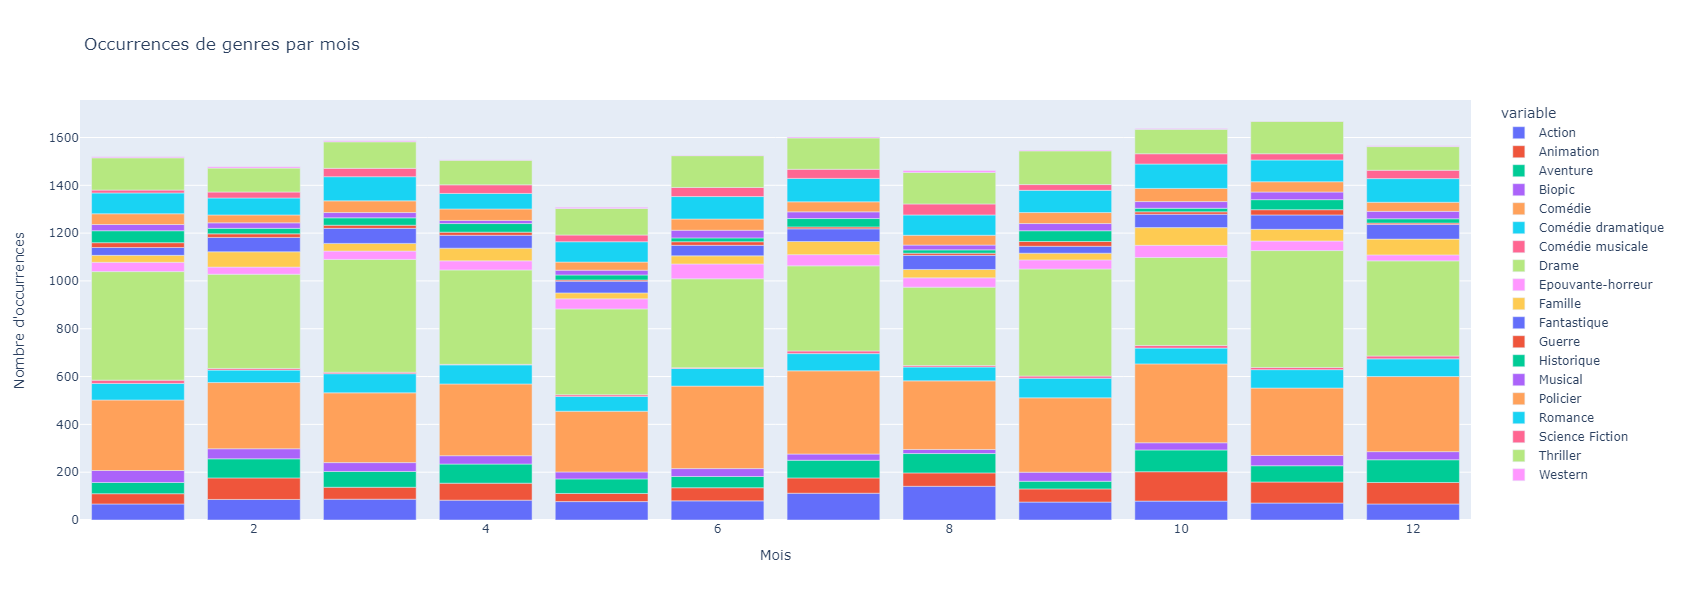

In [14]:
# Création d'un DataFrame avec le nombre d'occurrences de chaque genre par mois
genre_counts_by_month = allocine.groupby('release_month')[genres_list].sum().reset_index()

# Création du graphique interactif avec Plotly
fig = px.bar(genre_counts_by_month, x='release_month', y=genres_list,
             labels={'value': 'Nombre d\'occurrences', 'release_month': 'Mois'},
             title='Occurrences de genres par mois',
             hover_name='release_month', 
             category_orders={'release_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']},
             height=600)

fig.show()

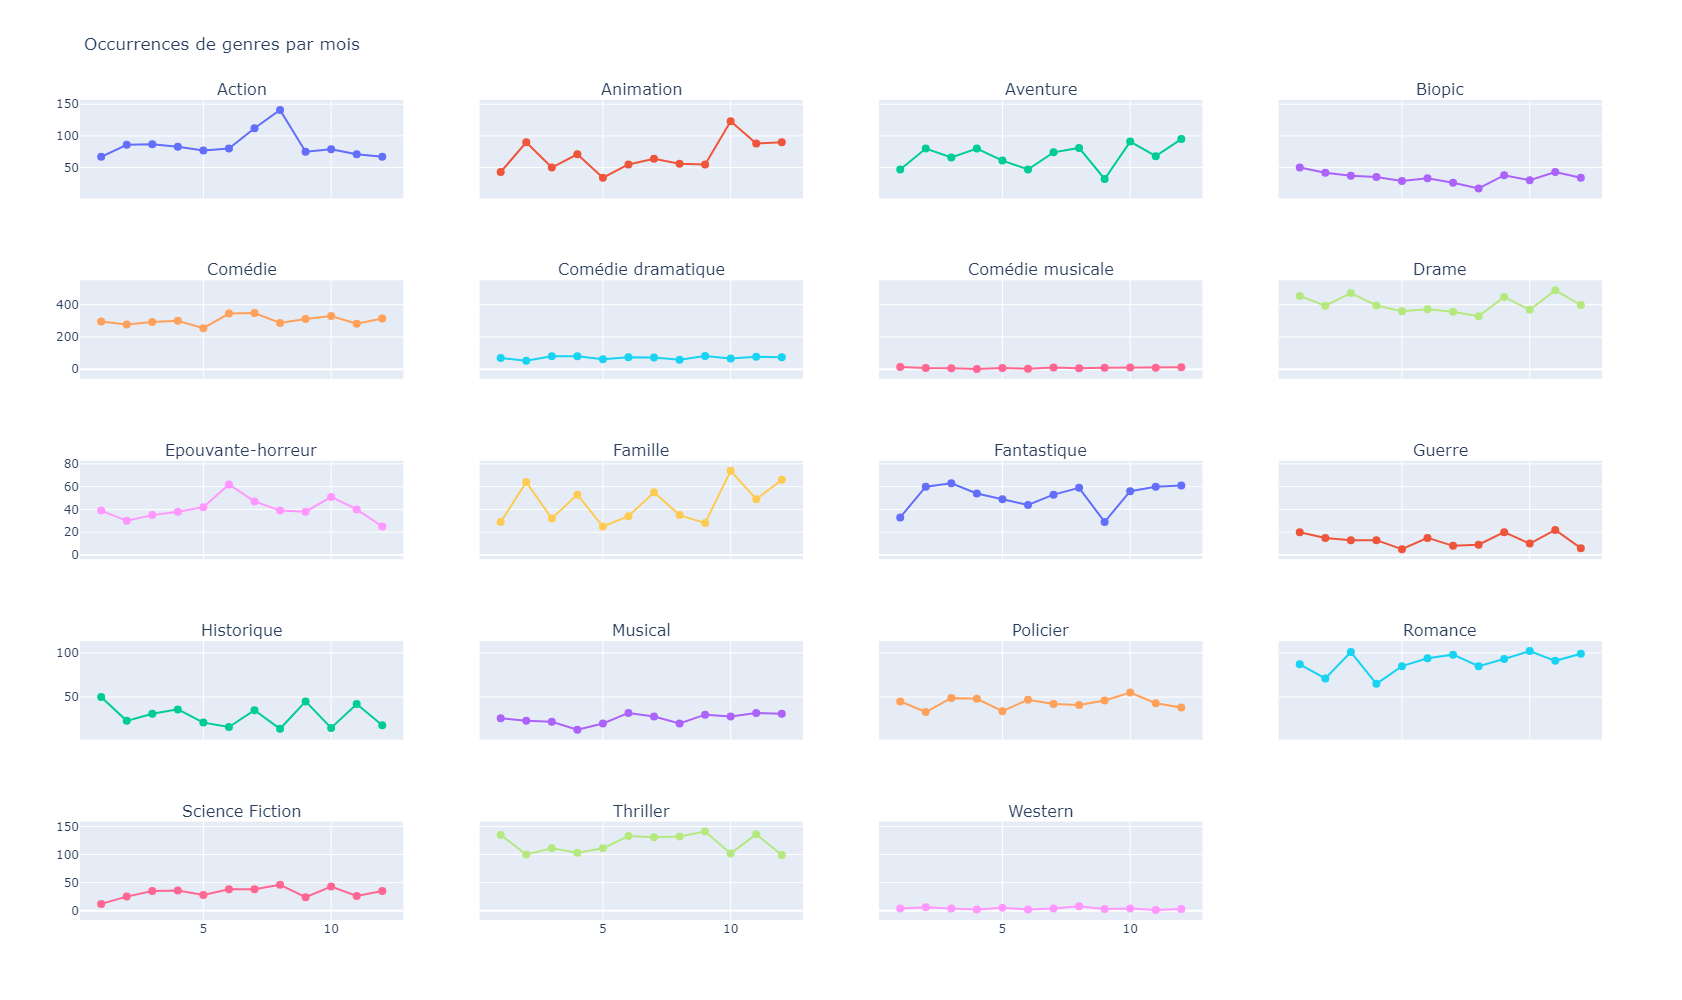

In [15]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Supposons que votre DataFrame s'appelle concat_clean
# et que vous avez créé les colonnes de genres comme indiqué précédemment.

# Création d'un subplot 4x4
fig = sp.make_subplots(rows=5, cols=4, subplot_titles=genres_list, shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.1)

# Ajout des courbes pour chaque genre
for i, genre in enumerate(genres_list, start=1):
    genre_counts_by_month = allocine.groupby('release_month')[genre].sum().reset_index()
    
    trace = go.Scatter(x=genre_counts_by_month['release_month'], y=genre_counts_by_month[genre],
                      mode='lines+markers',
                      name=f'{genre}',
                      marker=dict(size=8),
                      line=dict(width=2),
                      )
    fig.add_trace(trace, row=(i-1)//4 + 1, col=(i-1) % 4 + 1)

# Personnalisation du layout
fig.update_layout(title_text="Occurrences de genres par mois",
                  showlegend=False,
                  height=1000, width=1500)

fig.show()

In [17]:
# On remarque des pics de certains genres à des périodes clés. Notamment les films d'horreurs sont plus représentés en octobre (Halloween). 
# Les films d'animation sont plus représentés pendant la période des fêtes de fin d'année (entre décembre et janvier)
# Il y a un pic de films d'action pendant l'été (traditionnelement période où sortent les blockbusters).

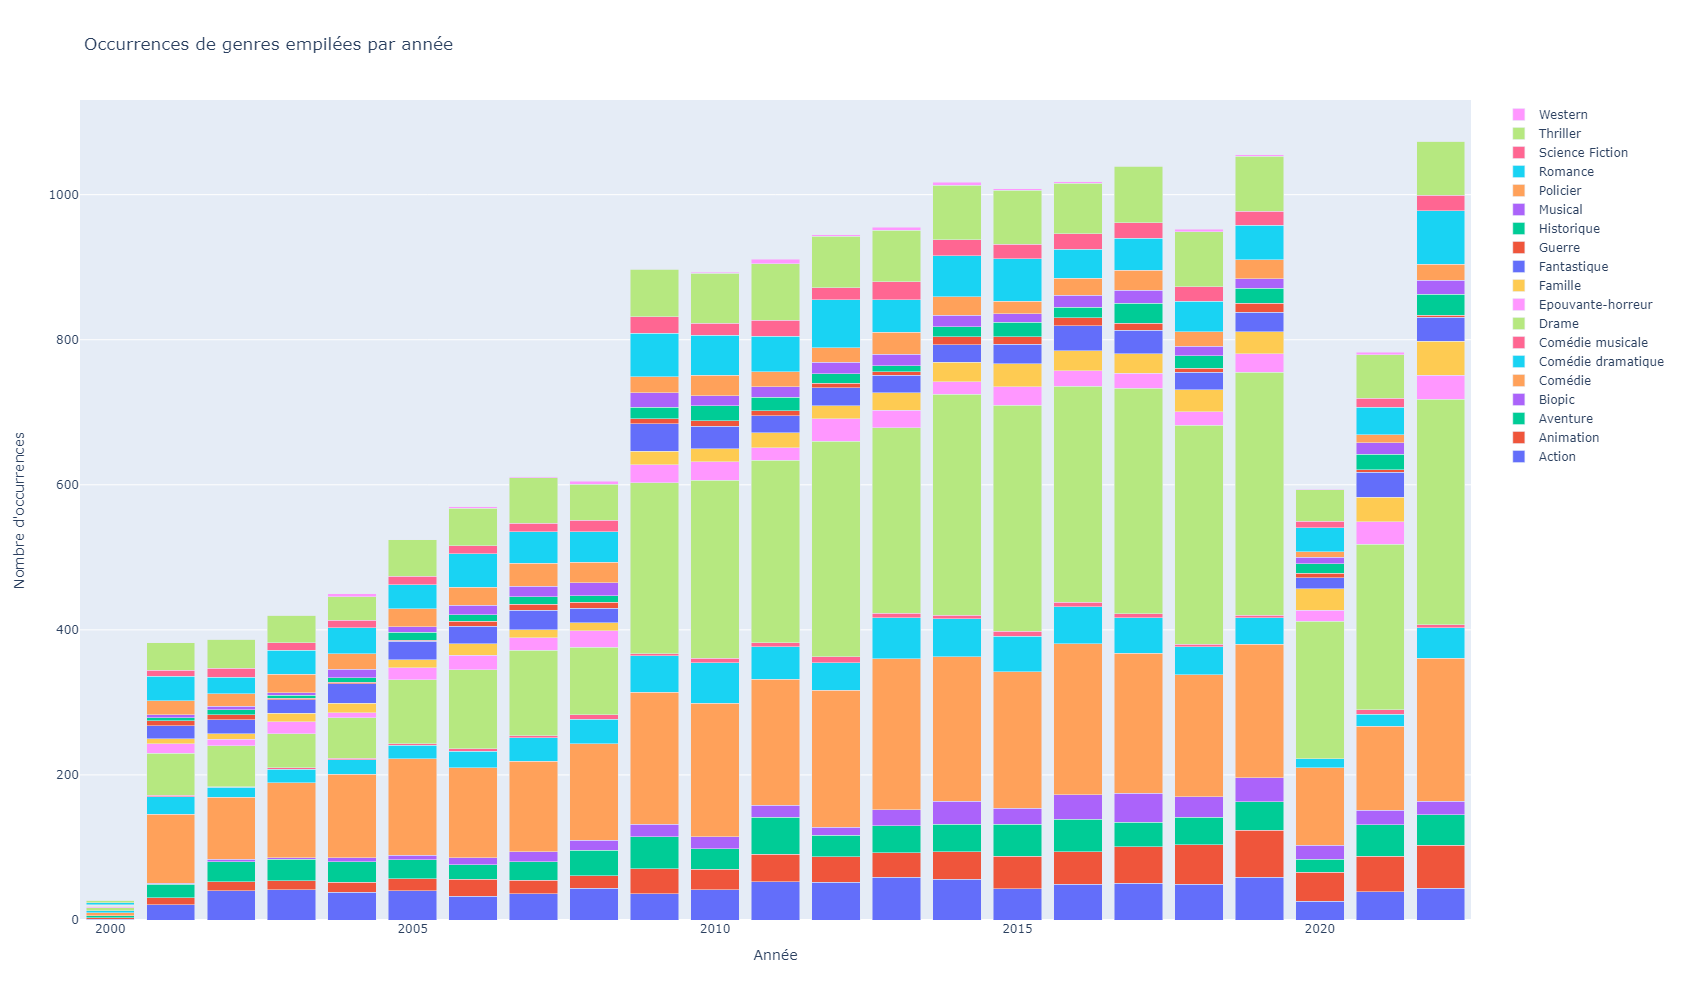

In [16]:
# Agrégation des données par année pour tous les genres
genre_counts_by_year = allocine.groupby('release_year')[genres_list].sum().reset_index()
genre_counts_by_year = genre_counts_by_year[(genre_counts_by_year['release_year'] >= 2000) & (genre_counts_by_year['release_year'] <= 2022)]

# Création du graphique empilé
fig = go.Figure()

for genre in genres_list:
    fig.add_trace(go.Bar(x=genre_counts_by_year['release_year'], y=genre_counts_by_year[genre], name=genre, hoverinfo='y+name'))

# Personnalisation du layout
fig.update_layout(title_text="Occurrences de genres empilées par année",
                  barmode='stack',
                  xaxis=dict(title='Année'),
                  yaxis=dict(title='Nombre d\'occurrences'),
                  height=1000, width=1500)

fig.show()

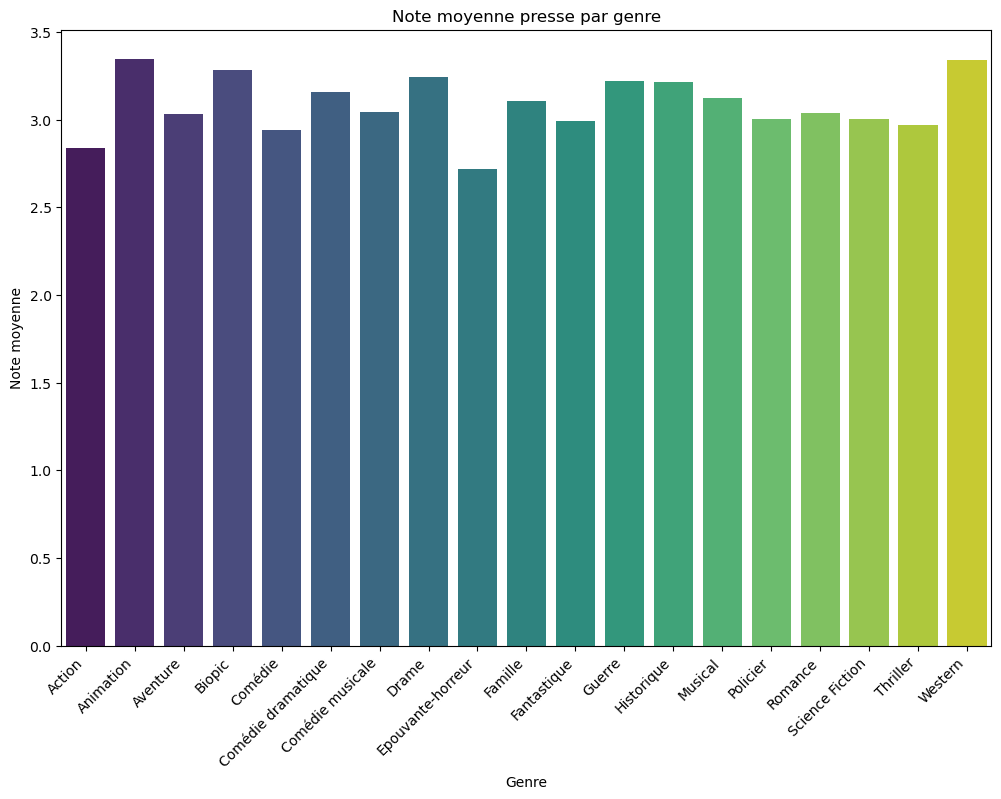

In [17]:
# Calcul des notes moyennes des films selon les genres (colonne 'note_presse')

# Créer un DataFrame avec les colonnes pertinentes
genres_allocine_presse = allocine[['note_presse'] + genres_list]

# Filtrer les films avec une note supérieure à 0
genres_allocine_presse = genres_allocine_presse[genres_allocine_presse['note_presse'] > 0]

# Melt pour transformer le DataFrame en un format adapté à Seaborn
melted_genres_allocine_presse = pd.melt(genres_allocine_presse, id_vars='note_presse', value_vars=genres_list, var_name='Genre', value_name='Genre_Flag')

# Filtrer uniquement les films qui appartiennent au genre
filtered_genres_allocine_presse = melted_genres_allocine_presse[melted_genres_allocine_presse['Genre_Flag']]

# Calculer la moyenne par genre
allocine_presse_by_genre = filtered_genres_allocine_presse.groupby('Genre')['note_presse'].mean().reset_index()

# Créer un graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='note_presse', data=allocine_presse_by_genre, palette='viridis')
plt.title('Note moyenne presse par genre')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show()

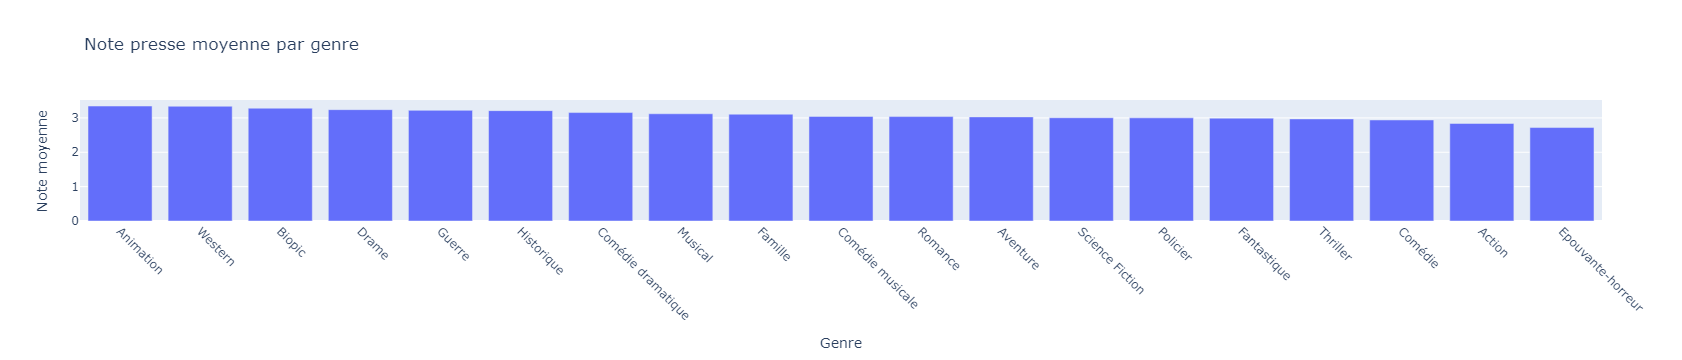

In [18]:
# Classer les genres par note moyenne décroissante
allocine_presse_by_genre = allocine_presse_by_genre.sort_values(by='note_presse', ascending=False)

# Créer un graphique à barres interactif avec Plotly
fig = px.bar(allocine_presse_by_genre, x='Genre', y='note_presse', title='Note presse moyenne par genre',
             labels={'note_presse': 'Note moyenne', 'Genre': 'Genre'})

# Ajuster l'angle des étiquettes pour une meilleure lisibilité
fig.update_xaxes(tickangle=45)

# Afficher le graphique
fig.show()

In [26]:
# Les notes moyennes presse pour tous les genres sont comprises entre 3,3/5 (Animation) et 2,7/5 (Epouvante-horreur).

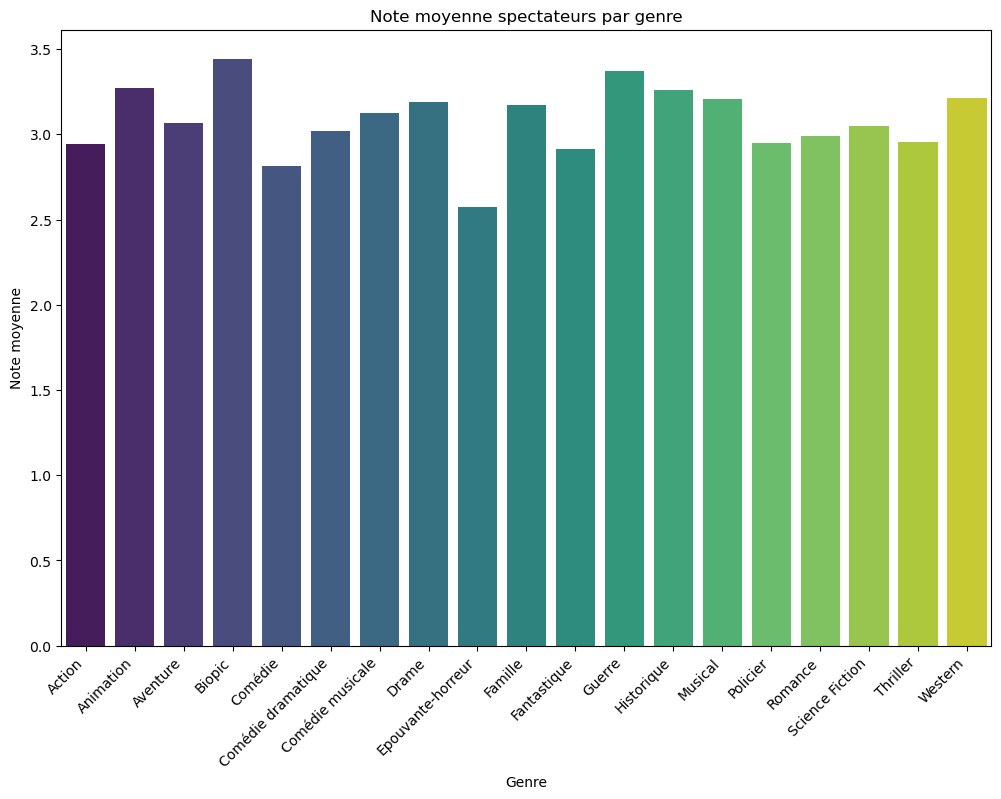

In [19]:
# Calcul des notes moyennes des films selon les genres (colonne 'note_spectateurs')

# Créer un DataFrame avec les colonnes pertinentes
genres_allocine_spec = allocine[['note_spectateurs'] + genres_list]

# Filtrer les films avec une note supérieure à 0
genres_allocine_spec = genres_allocine_spec[genres_allocine_spec['note_spectateurs'] > 0]

# Melt pour transformer le DataFrame en un format adapté à Seaborn
melted_genres_allocine_spec = pd.melt(genres_allocine_spec, id_vars='note_spectateurs', value_vars=genres_list, var_name='Genre', value_name='Genre_Flag')

# Filtrer uniquement les films qui appartiennent au genre
filtered_genres_allocine_spec = melted_genres_allocine_spec[melted_genres_allocine_spec['Genre_Flag']]

# Calculer la moyenne par genre
allocine_spec_by_genre = filtered_genres_allocine_spec.groupby('Genre')['note_spectateurs'].mean().reset_index()

# Créer un graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='note_spectateurs', data=allocine_spec_by_genre, palette='viridis')
plt.title('Note moyenne spectateurs par genre')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show()

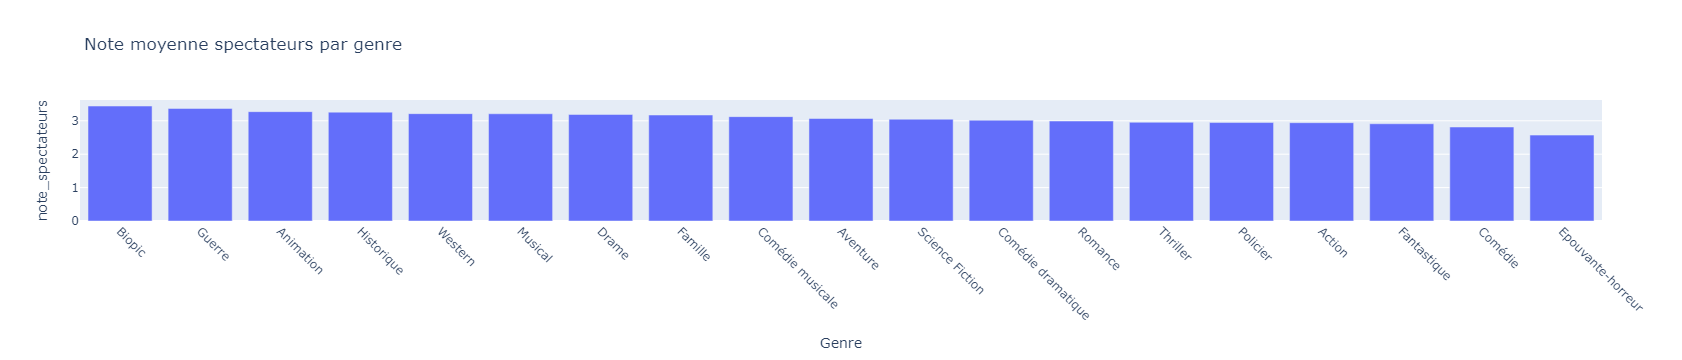

In [20]:
# Classer les genres par note moyenne décroissante
allocine_spec_by_genre = allocine_spec_by_genre.sort_values(by='note_spectateurs', ascending=False)

# Créer un graphique à barres interactif avec Plotly
fig = px.bar(allocine_spec_by_genre, x='Genre', y='note_spectateurs', title='Note moyenne spectateurs par genre',
             labels={'note_presse': 'Note moyenne', 'Genre': 'Genre'})

# Ajuster l'angle des étiquettes pour une meilleure lisibilité
fig.update_xaxes(tickangle=45)

# Afficher le graphique
fig.show()

In [29]:
# Les notes moyennes spectateurs pour tous les genres sont comprises entre 3,4/5 (Biopic) et 2,6/5 (Epouvante-horreur).

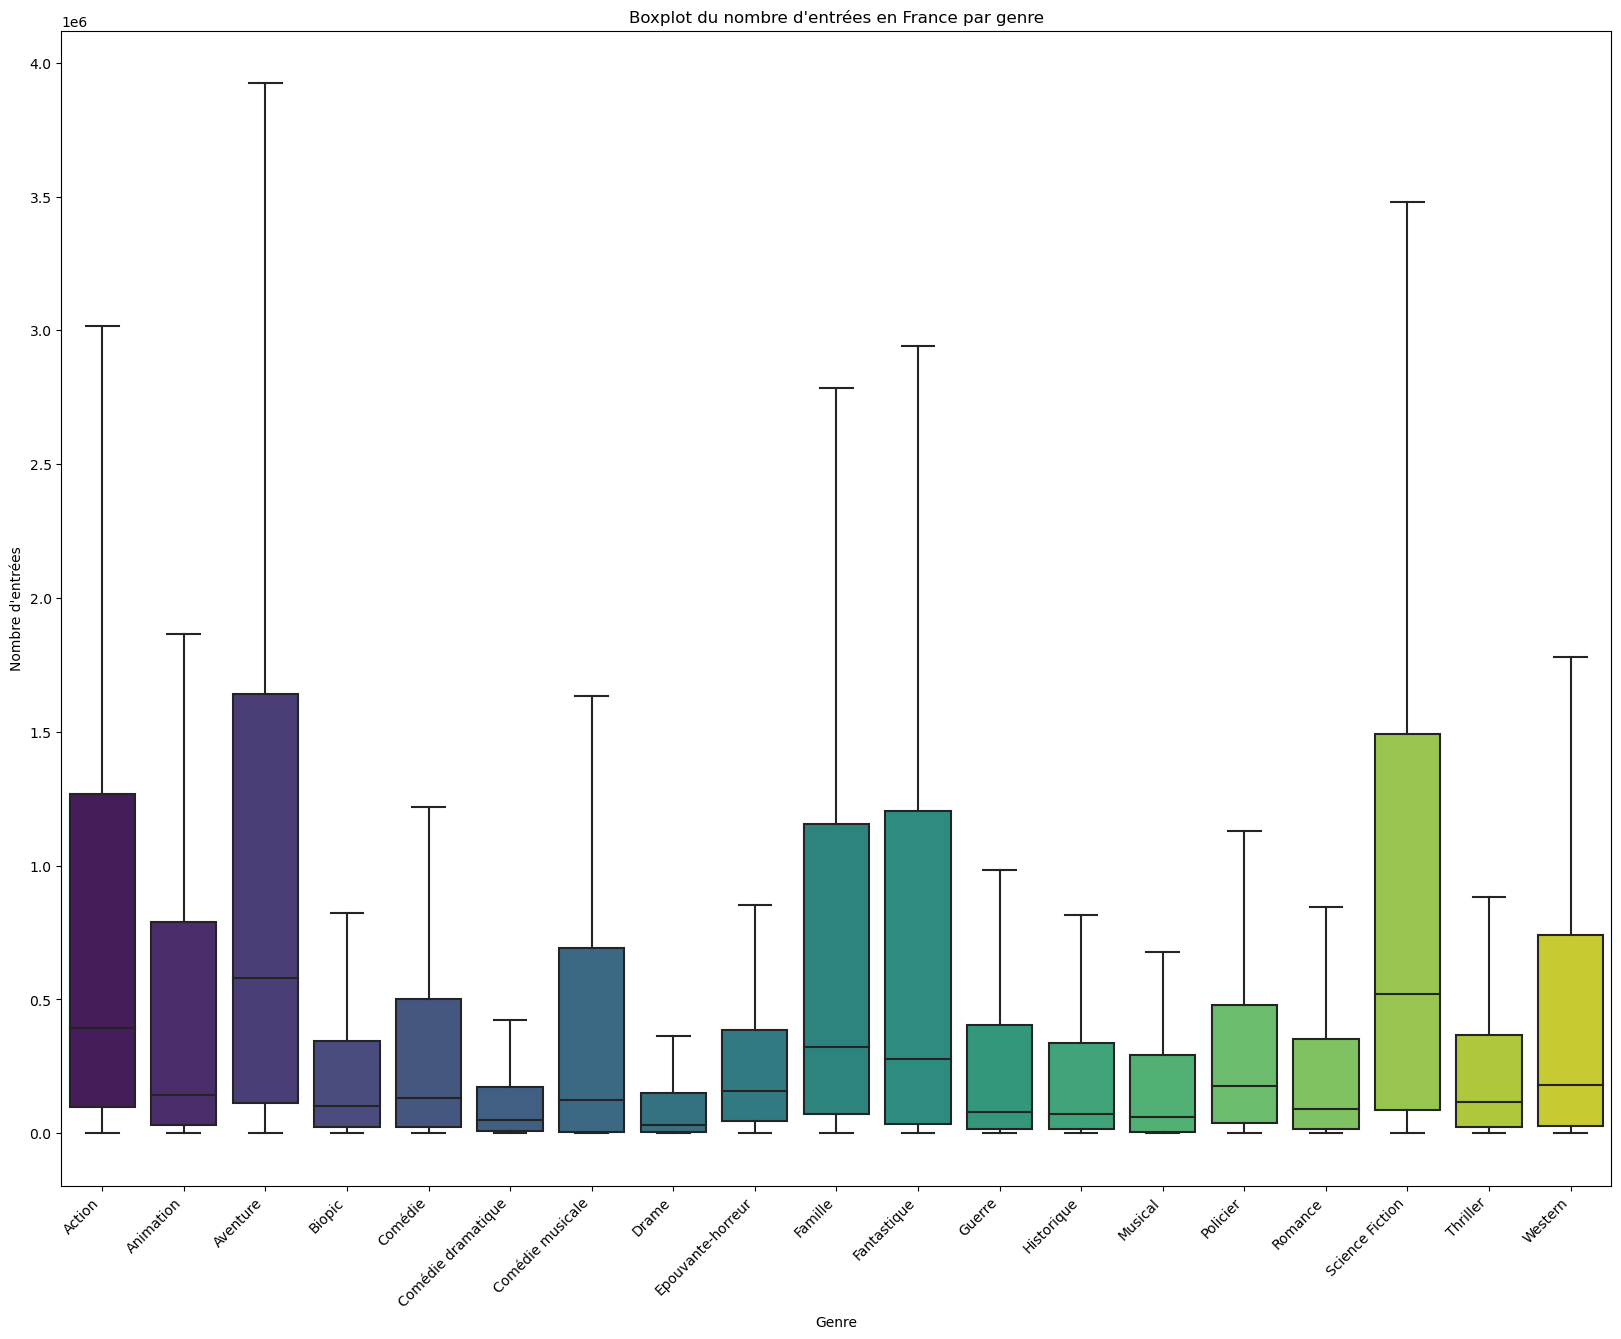

In [21]:
# Analyse des genres qui génèrent le plus d'entrées en France

# Créer un DataFrame avec les colonnes pertinentes
genres_allocine_france = allocine[['cumul_france'] + genres_list]

# Filtrer les films avec un revenu supérieur à 0
genres_allocine_france = genres_allocine_france[genres_allocine_france['cumul_france'] > 0]

# Melt pour transformer le DataFrame en un format adapté à Seaborn
melted_genres_allocine_france = pd.melt(genres_allocine_france, id_vars='cumul_france', value_vars=genres_list, var_name='Genre', value_name='Genre_Flag')

# Filtrer uniquement les films qui appartiennent au genre
filtered_genres_allocine_france = melted_genres_allocine_france[melted_genres_allocine_france['Genre_Flag']]

# Créer un boxplot avec Seaborn (en excluant les valeurs extrêmes)
plt.figure(figsize=(20, 15))
sns.boxplot(x='Genre', y='cumul_france', data=filtered_genres_allocine_france, palette='viridis', sym='')
plt.title("Boxplot du nombre d'entrées en France par genre")
plt.xlabel('Genre')
plt.ylabel("Nombre d'entrées")
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show()

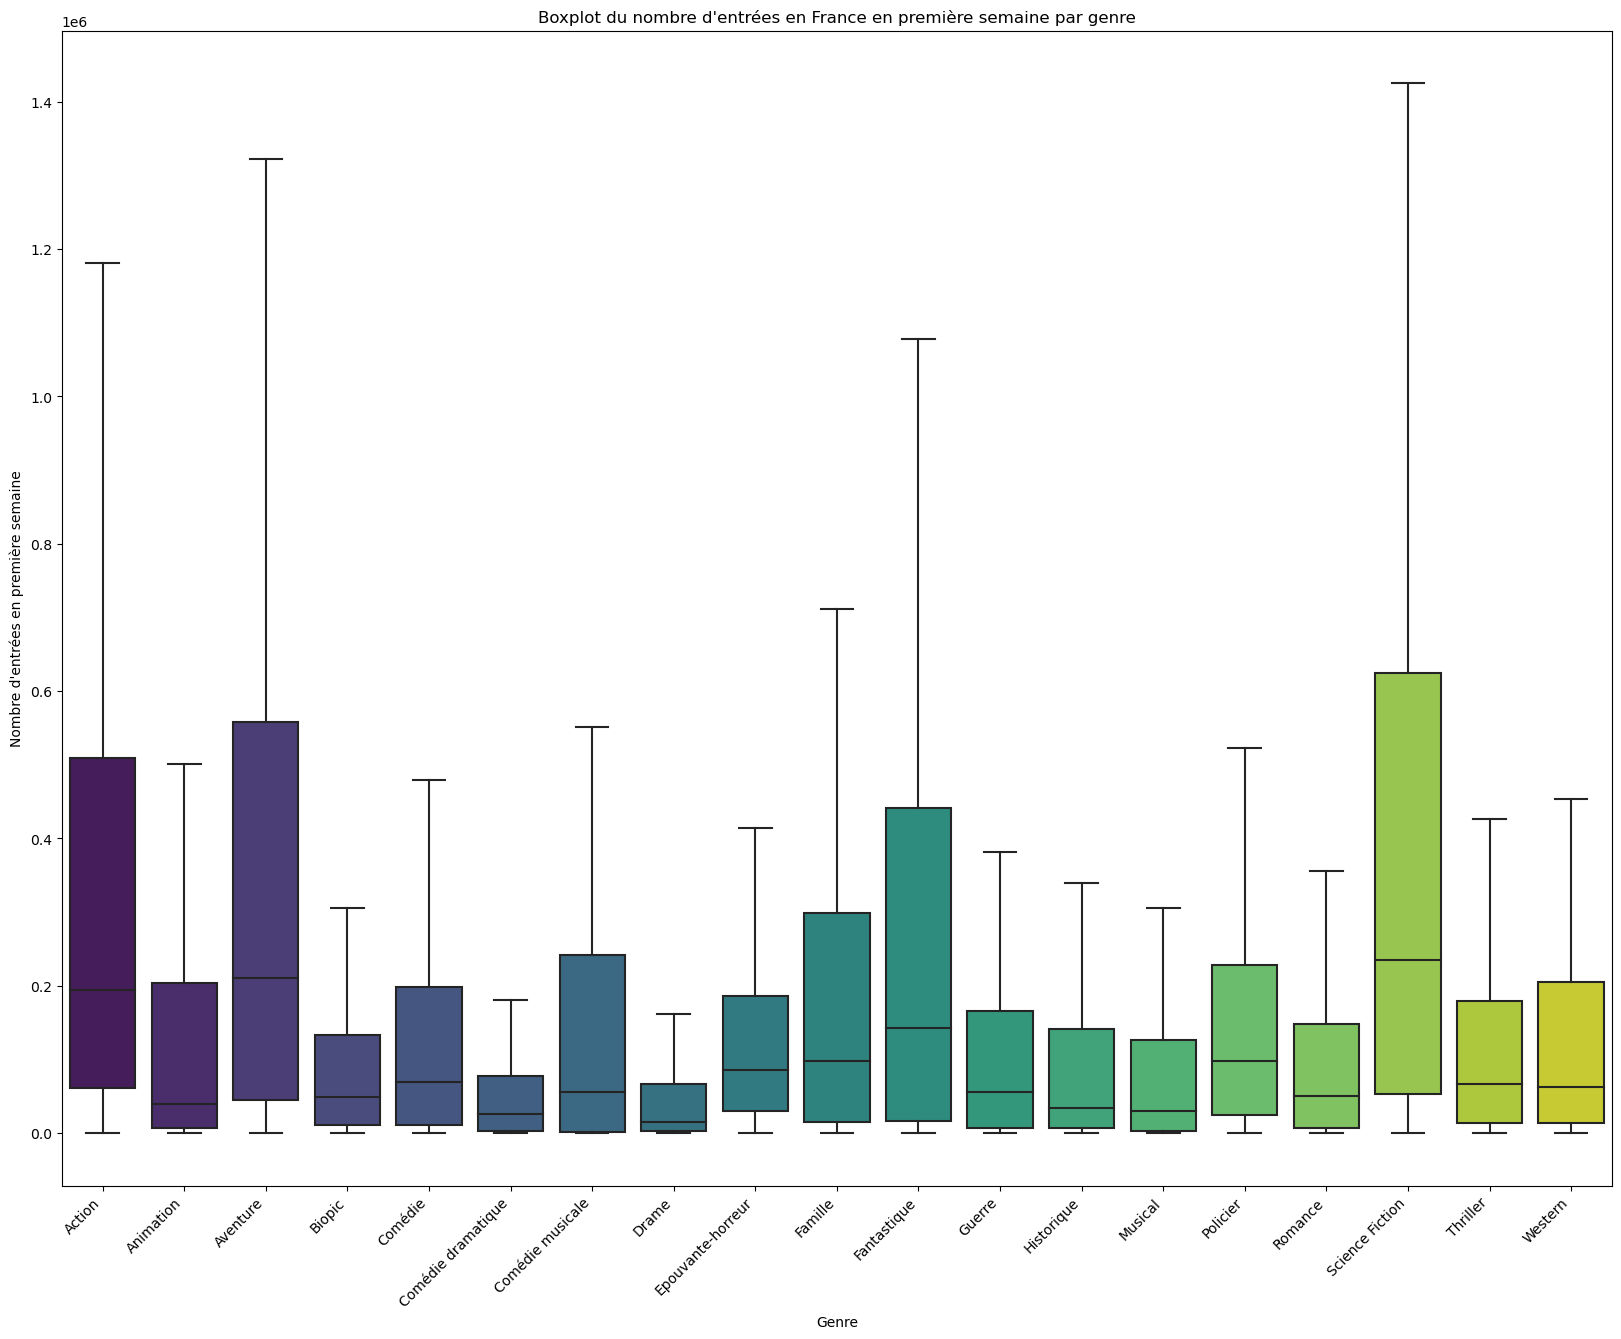

In [23]:
# Analyse des genres qui génèrent le plus d'entrées en France en première semaine

# Créer un DataFrame avec les colonnes pertinentes
genres_allocine_france_premiere = allocine[['premiere_semaine_france'] + genres_list]

# Filtrer les films avec un revenu supérieur à 0
genres_allocine_france_premiere = genres_allocine_france_premiere[genres_allocine_france_premiere['premiere_semaine_france'] > 0]

# Melt pour transformer le DataFrame en un format adapté à Seaborn
melted_genres_allocine_france_premiere = pd.melt(genres_allocine_france_premiere, id_vars='premiere_semaine_france', value_vars=genres_list, var_name='Genre', value_name='Genre_Flag')

# Filtrer uniquement les films qui appartiennent au genre
filtered_genres_allocine_france_premiere = melted_genres_allocine_france_premiere[melted_genres_allocine_france_premiere['Genre_Flag']]

# Créer un boxplot avec Seaborn (en excluant les valeurs extrêmes)
plt.figure(figsize=(20, 15))
sns.boxplot(x='Genre', y='premiere_semaine_france', data=filtered_genres_allocine_france_premiere, palette='viridis', sym='')
plt.title("Boxplot du nombre d'entrées en France en première semaine par genre")
plt.xlabel('Genre')
plt.ylabel("Nombre d'entrées en première semaine")
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show()

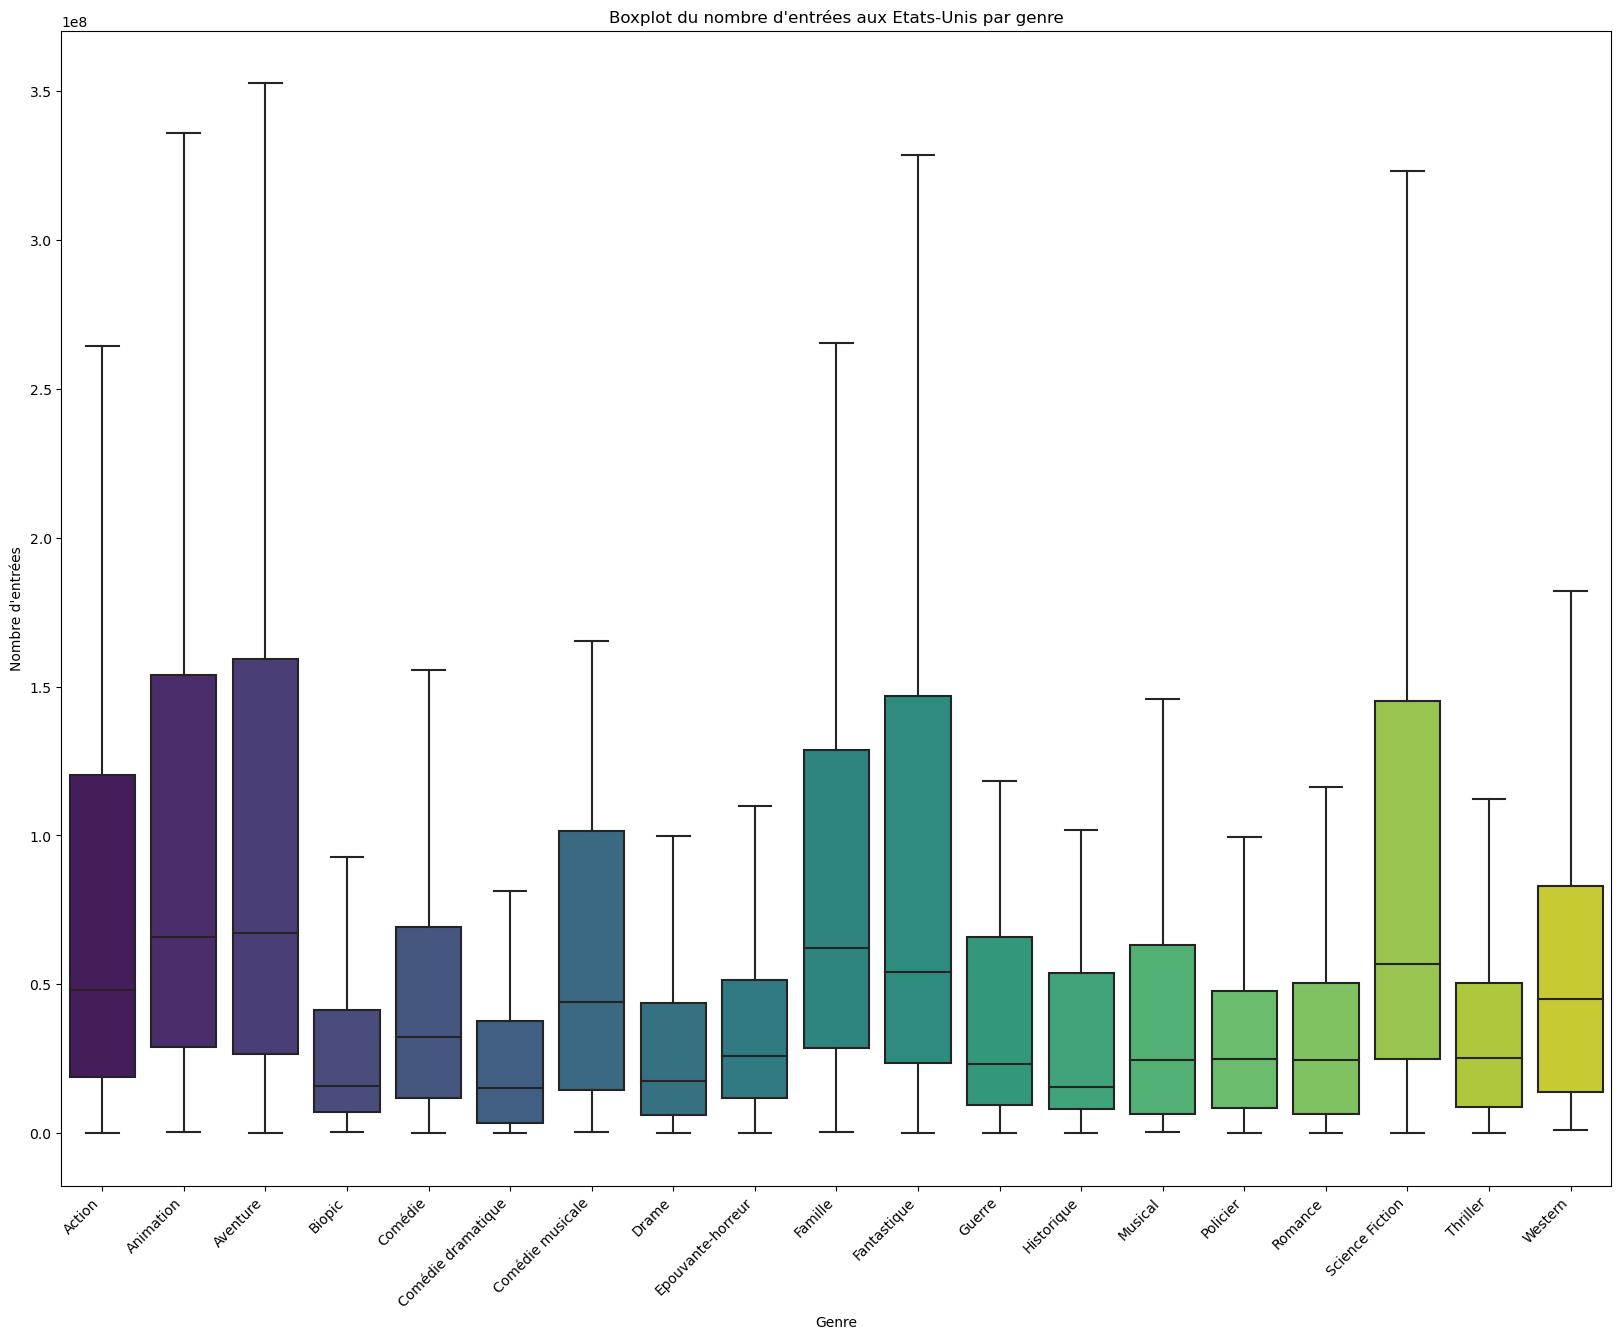

In [33]:
# Analyse des genres qui génèrent le plus d'entrées aux Etats-Unis

# Créer un DataFrame avec les colonnes pertinentes
genres_allocine_US = allocine[['cumul_US'] + genres_list]

# Filtrer les films avec un revenu supérieur à 0
genres_allocine_US = genres_allocine_US[genres_allocine_US['cumul_US'] > 0]

# Melt pour transformer le DataFrame en un format adapté à Seaborn
melted_genres_allocine_US = pd.melt(genres_allocine_US, id_vars='cumul_US', value_vars=genres_list, var_name='Genre', value_name='Genre_Flag')

# Filtrer uniquement les films qui appartiennent au genre
filtered_genres_allocine_US = melted_genres_allocine_US[melted_genres_allocine_US['Genre_Flag']]

# Créer un boxplot avec Seaborn (en excluant les valeurs extrêmes)
plt.figure(figsize=(20, 15))
sns.boxplot(x='Genre', y='cumul_US', data=filtered_genres_allocine_US, palette='viridis', sym='')
plt.title("Boxplot du nombre d'entrées aux Etats-Unis par genre")
plt.xlabel('Genre')
plt.ylabel("Nombre d'entrées")
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show()

In [34]:
# On remarque qu'en France, c'est le genre Aventure que génère le plus de spectateurs. Aux Etats-Unis, ce genre est talonné de près par l'animation. 
# Le drame, genre très représenté chaque année, est loin d'attirer le plus de spectateurs dans les deux pays.

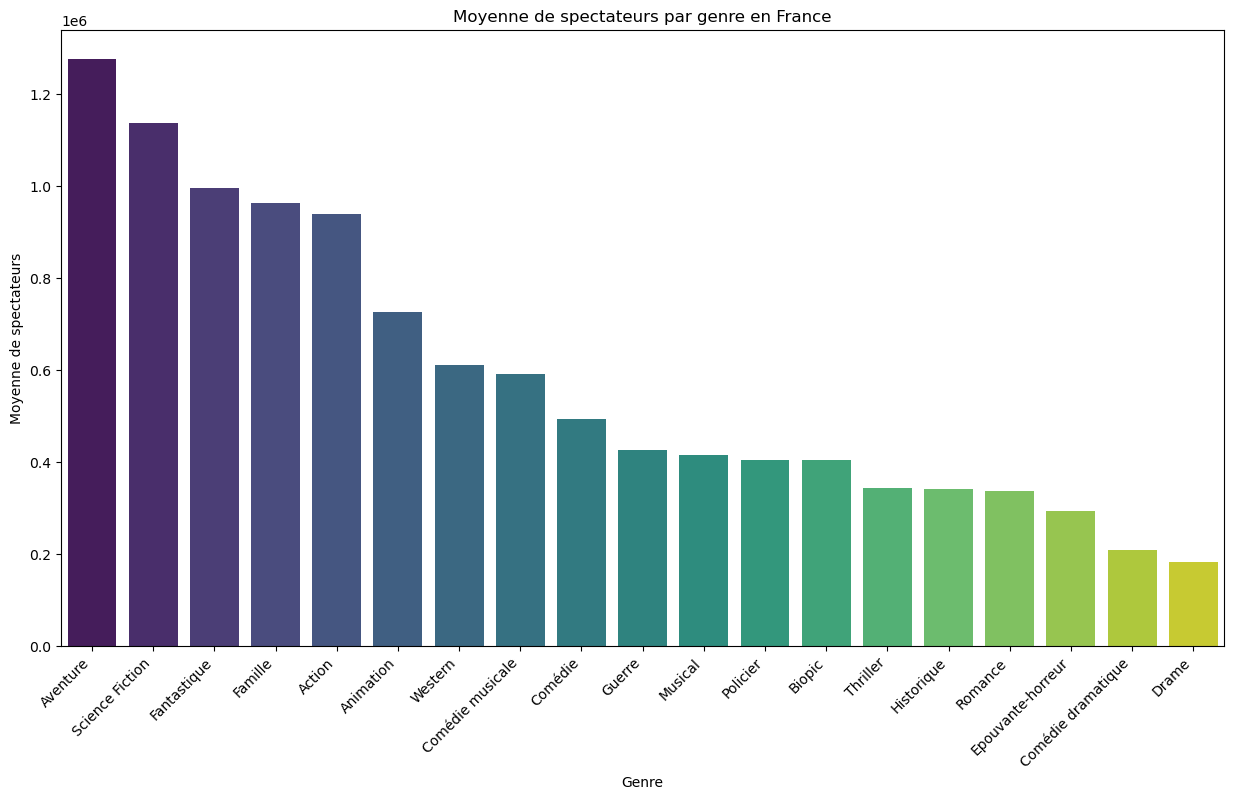

In [37]:
# Calculer la moyenne de spectateurs par genre en France
average_spec_by_genre_france = filtered_genres_allocine_france.groupby('Genre')['cumul_france'].mean().reset_index()

# Trier le DataFrame par moyenne de revenu décroissante
average_spec_by_genre_france = average_spec_by_genre_france.sort_values(by='cumul_france', ascending=False)

# Créer un graphique à barres avec Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Genre', y='cumul_france', data=average_spec_by_genre_france, palette='viridis')
plt.title('Moyenne de spectateurs par genre en France')
plt.xlabel('Genre')
plt.ylabel('Moyenne de spectateurs')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show();

In [39]:
# En France, on remarque que c'est le genre "Aventure" qui génère la plus haute moyenne de spectateurs. 
# Les drames, très représentés chaque année, on la moins bone moyenne.

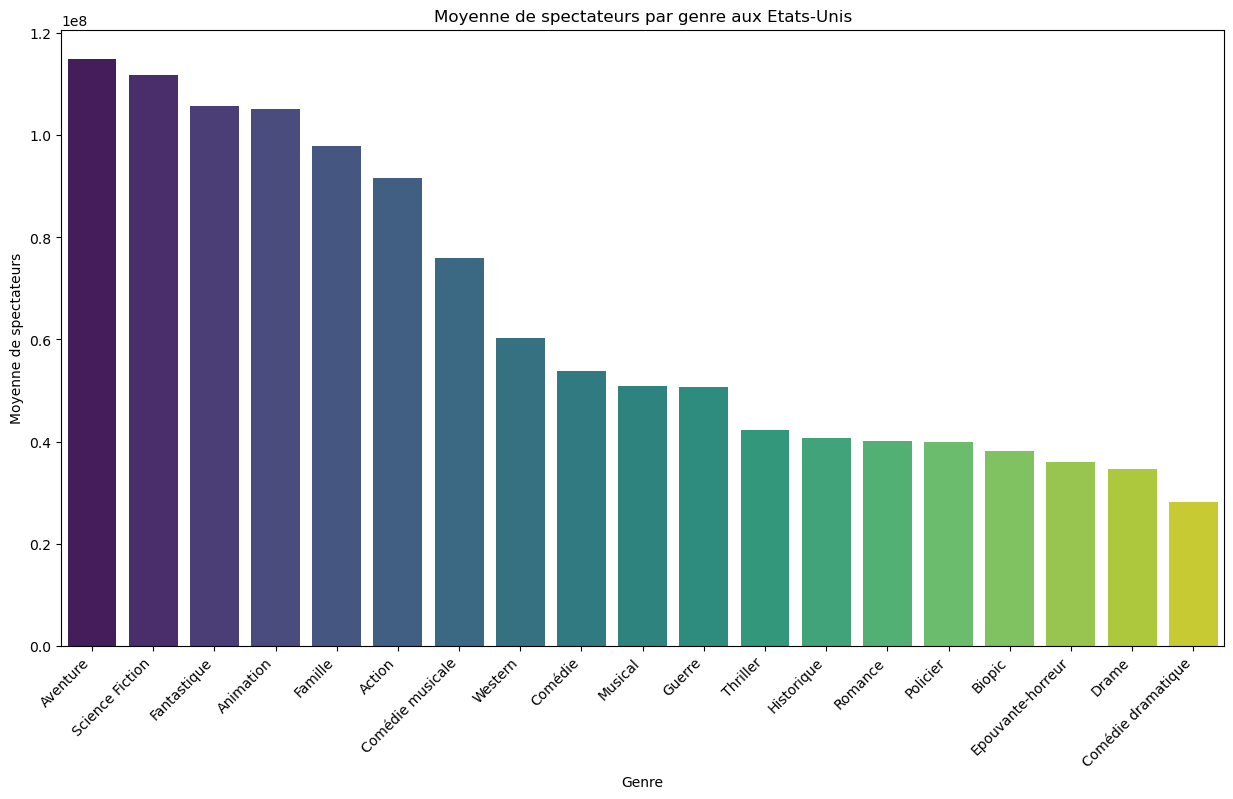

In [41]:
# Calculer la moyenne de spectateurs par genre en France
average_spec_by_genre_US = filtered_genres_allocine_US.groupby('Genre')['cumul_US'].mean().reset_index()

# Trier le DataFrame par moyenne de revenu décroissante
average_spec_by_genre_US = average_spec_by_genre_US.sort_values(by='cumul_US', ascending=False)

# Créer un graphique à barres avec Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Genre', y='cumul_US', data=average_spec_by_genre_US, palette='viridis')
plt.title('Moyenne de spectateurs par genre aux Etats-Unis')
plt.xlabel('Genre')
plt.ylabel('Moyenne de spectateurs')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes pour une meilleure lisibilité
plt.show();

In [42]:
# Aux Etats-Unis comme en France, on remarque que c'est le genre "Aventure" qui génère la plus haute moyenne de spectateurs, suivi de près par les films de Science-Fiction.
# Ce sont les comédies dramatiques qui attirent le moins de spectateurs dans les salles.